In [1]:
#librerias
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [36]:
#variables
Imports = r'C:\HAD\Unidad_2\Analitica_datos\Files\bd_importaciones2024_agosto.xlsx'
Imports_sheet='BD Importaciones'
Imports_header=16
Exports=r'C:\HAD\Unidad_2\Analitica_datos\Files\bd_exportaciones_agosto2024.xlsx'
Exports_sheet='BD Exportaciones'
Exports_header=17

color_map = {'Import': 'blue', 'Export': 'red', 'NA': 'green'}
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

In [3]:
#Ruta Absoluta
ruta_absoluta = os.path.abspath(Imports)
print(ruta_absoluta)
ruta_absoluta = os.path.abspath(Exports)
print(ruta_absoluta)

C:\HAD\Unidad_2\Analitica_datos\Files\bd_importaciones2024_agosto.xlsx
C:\HAD\Unidad_2\Analitica_datos\Files\bd_exportaciones_agosto2024.xlsx


In [12]:
# Leer los archivos - Tipos de Datos
df_imports = pd.read_excel(io=Imports, sheet_name=Imports_sheet, header=Imports_header)

# Eliminar espacios en los nombres de columnas
df_imports.columns = df_imports.columns.str.strip()

# Verificar valores nulos
print("Valores nulos antes de eliminar:")
print(df_imports.isnull().sum())

# Eliminar columnas con valores que no se van a utilizar en la data
df_cleaned_imports = df_imports.dropna(thresh=3)  # Mantén filas con al menos 3 valores no nulos.)

# Verificar el tamaño del DataFrame después de la limpieza
print(f"Tamaño del Data frame original: {df_imports.shape}")
print(f"Tamaño del DataFrame limpio: {df_cleaned_imports.shape}")

# Verificar si aún hay valores nulos
print("\nValores nulos después de eliminar:")
print(df_cleaned_imports.isnull().sum())

Valores nulos antes de eliminar:
Periodo                           0
Mes                               0
Codigo departamento destino       0
Departamento destino              0
Codigo pais origen                0
Pais de origen                    0
Codigo partida                    0
Nombre partida                 3206
Codigo ciiu rev4                  0
Descripcion ciiu rev4          1447
Codigo capitulo                   0
Nombre capitulo                   0
Nivel tecnologico                 0
Codigo uso economico              0
Uso economico                     0
Detalle uso economico             0
Dolares CIF                       0
Dolares FOB                       0
Kilogramos netos                  0
Cantidad                          0
dtype: int64
Tamaño del Data frame original: (273470, 20)
Tamaño del DataFrame limpio: (273470, 20)

Valores nulos después de eliminar:
Periodo                           0
Mes                               0
Codigo departamento destino       0
Dep

In [5]:
# Verificar los tipos de datos
print("Tipos de Datos Importaciones:")
print(df_cleaned_imports.dtypes)

Tipos de Datos Importaciones:
Periodo                          int64
Mes                              int64
Codigo departamento destino      int64
Departamento destino            object
Codigo pais origen               int64
Pais de origen                  object
Codigo partida                   int64
Nombre partida                  object
Codigo ciiu rev4                 int64
Descripcion ciiu rev4           object
Codigo capitulo                  int64
Nombre capitulo                 object
Nivel tecnologico               object
Codigo uso economico             int64
Uso economico                   object
Detalle uso economico           object
Dolares CIF                    float64
Dolares FOB                    float64
Kilogramos netos               float64
Cantidad                       float64
dtype: object


In [14]:
drop_imports_columns = ['Codigo departamento destino', 'Codigo partida', 'Codigo ciiu rev4','Codigo capitulo','Codigo uso economico']
df_drop_imports = df_cleaned_imports.drop(columns=drop_imports_columns)
print(f"Columnas después de eliminar: {df_drop_imports.columns}")

Columnas después de eliminar: Index(['Periodo', 'Mes', 'Departamento destino', 'Codigo pais origen',
       'Pais de origen', 'Nombre partida', 'Descripcion ciiu rev4',
       'Nombre capitulo', 'Nivel tecnologico', 'Uso economico',
       'Detalle uso economico', 'Dolares CIF', 'Dolares FOB',
       'Kilogramos netos', 'Cantidad'],
      dtype='object')


In [22]:
print(df_drop_imports.head(5))

   Periodo  Mes Departamento destino  Codigo pais origen Pais de origen  \
0     2024    1          Sin definir                  23       Alemania   
1     2024    1          Sin definir                  23       Alemania   
2     2024    1          Sin definir                  23       Alemania   
3     2024    1          Sin definir                  23       Alemania   
4     2024    1          Sin definir                  23       Alemania   

                                      Nombre partida  \
0  Alcohol etílico sin desnaturalizar con grado a...   
1  Medicamentos (excepto los productos de las par...   
2  Reactivos de diagnóstico o de laboratorio sobr...   
3  Correas transportadoras o de transmisión, de c...   
4  Las demás manufacturas de caucho vulcanizado s...   

                               Descripcion ciiu rev4  \
0  Destilación, rectificación y mezcla de bebidas...   
1  Fabricación de productos farmacéuticos, sustan...   
2     Fabricación de otros productos químico

In [9]:
# Leer los archivos - Tipos de Datos
df_exports = pd.read_excel(io=Exports, sheet_name=Exports_sheet, header=Exports_header)

# Eliminar espacios en los nombres de columnas
df_exports.columns = df_exports.columns.str.strip()

# Verificar valores nulos
print("Valores nulos antes de eliminar:")
print(df_exports.isnull().sum())

# Eliminar filas con valores nulos
df_cleaned_exports = df_exports.dropna(thresh=3)

# Verificar el tamaño del DataFrame después de la limpieza
print(f"Tamaño del Data frame original: {df_exports.shape}")
print(f"Tamaño del DataFrame limpio: {df_cleaned_exports.shape}")

# Verificar si aún hay valores nulos
print("\nValores nulos después de eliminar:")
print(df_cleaned_exports.isnull().sum())

Valores nulos antes de eliminar:
Periodo                          0
Mes                              0
Codigo departamento origen       0
Departamento origen              0
Codigo pais destino              0
Pais destino                     0
Codigo partida                   0
Nombre partida                1203
Codigo ciiu rev4                 0
Descripcion ciiu rev4         1020
Codigo capitulo                  0
Nombre capitulo                  0
Nivel tecnologico                0
Codigo unidad                    0
unidad                           0
Dolares FOB                      0
Kilogramos netos                 0
Cantidad                         0
dtype: int64
Tamaño del Data frame original: (107873, 18)
Tamaño del DataFrame limpio: (107873, 18)

Valores nulos después de eliminar:
Periodo                          0
Mes                              0
Codigo departamento origen       0
Departamento origen              0
Codigo pais destino              0
Pais destino              

In [7]:
# Verificar los tipos de datos
print("Tipos de Datos Exportaciones:")
print(df_cleaned_exports.dtypes)

Tipos de Datos Exportaciones:
Periodo                         int64
Mes                             int64
Codigo departamento origen      int64
Departamento origen            object
Codigo pais destino             int64
Pais destino                   object
Codigo partida                  int64
Nombre partida                 object
Codigo ciiu rev4               object
Descripcion ciiu rev4          object
Codigo capitulo                 int64
Nombre capitulo                object
Nivel tecnologico              object
Codigo unidad                  object
unidad                         object
Dolares FOB                   float64
Kilogramos netos              float64
Cantidad                      float64
dtype: object


In [19]:
drop_exports_columns = ['Codigo departamento origen', 'Codigo pais destino', 'Codigo partida','Codigo ciiu rev4','Codigo capitulo','Codigo unidad']
df_drop_exports = df_cleaned_exports.drop(columns=drop_exports_columns)
print(f"Columnas después de eliminar: {df_drop_exports.columns}")

Columnas después de eliminar: Index(['Periodo', 'Mes', 'Departamento origen', 'Pais destino',
       'Nombre partida', 'Descripcion ciiu rev4', 'Nombre capitulo',
       'Nivel tecnologico', 'unidad', 'Dolares FOB', 'Kilogramos netos',
       'Cantidad'],
      dtype='object')


In [ ]:
print(df_drop_exports.head(5))

   Periodo  Mes Departamento origen Pais destino  \
0     2024    1         Sin definir      Bahamas   
1     2024    1         Sin definir      Bahamas   
2     2024    1         Sin definir        Otros   
3     2024    1         Sin definir       Brasil   
4     2024    1         Sin definir        China   

                                      Nombre partida  \
0  Aceites crudos de petróleo o de mineral bitumi...   
1  Aceites de petróleo o de mineral bituminoso, e...   
2  Aceites de petróleo o de mineral bituminoso, e...   
3  Coque de petróleo, betún de petróleo y demás r...   
4  Aceites crudos de petróleo o de mineral bitumi...   

                               Descripcion ciiu rev4  \
0                       Extracción de petróleo crudo   
1  Fabricación de productos de la refinación del ...   
2  Fabricación de productos de la refinación del ...   
3  Fabricación de productos de la refinación del ...   
4                       Extracción de petróleo crudo   

             

In [ ]:
#Nueva columna para identificar las datas unidas
df_drop_exports['Type'] = 'Export'
df_drop_imports['Type'] = 'Import'

In [24]:
# Combinar DataFrames
df_combined = pd.concat([df_drop_exports, df_drop_imports], ignore_index=True)

# Verificar la estructura del DataFrame combinado
print(df_combined.head())
print(df_combined['Type'].value_counts())

   Periodo  Mes Departamento origen Pais destino  \
0     2024    1         Sin definir      Bahamas   
1     2024    1         Sin definir      Bahamas   
2     2024    1         Sin definir        Otros   
3     2024    1         Sin definir       Brasil   
4     2024    1         Sin definir        China   

                                      Nombre partida  \
0  Aceites crudos de petróleo o de mineral bitumi...   
1  Aceites de petróleo o de mineral bituminoso, e...   
2  Aceites de petróleo o de mineral bituminoso, e...   
3  Coque de petróleo, betún de petróleo y demás r...   
4  Aceites crudos de petróleo o de mineral bitumi...   

                               Descripcion ciiu rev4  \
0                       Extracción de petróleo crudo   
1  Fabricación de productos de la refinación del ...   
2  Fabricación de productos de la refinación del ...   
3  Fabricación de productos de la refinación del ...   
4                       Extracción de petróleo crudo   

             

In [25]:
print(df_combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381343 entries, 0 to 381342
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Periodo                381343 non-null  int64  
 1   Mes                    381343 non-null  int64  
 2   Departamento origen    107873 non-null  object 
 3   Pais destino           107873 non-null  object 
 4   Nombre partida         376934 non-null  object 
 5   Descripcion ciiu rev4  378876 non-null  object 
 6   Nombre capitulo        381343 non-null  object 
 7   Nivel tecnologico      381343 non-null  object 
 8   unidad                 107873 non-null  object 
 9   Dolares FOB            381343 non-null  float64
 10  Kilogramos netos       381343 non-null  float64
 11  Cantidad               381343 non-null  float64
 12  Type                   381343 non-null  object 
 13  Departamento destino   273470 non-null  object 
 14  Codigo pais origen     273470 non-nu

Comparación de Dolares FOB y CIF por Detalle Uso Económico

Importancia de los combustibles:El alto valor en FOB y CIF para Combustibles sugiere que esta categoría es clave en las transacciones comerciales, probablemente debido a la alta demanda o volúmenes de transacción.

Categorías específicas como indicadores económicos:Vehículos particulares y Tabaco parecen ser indicadores de consumo interno o exportaciones relevantes para ciertos mercados.

Relación FOB-CIF:Una diferencia pequeña entre FOB y CIF en la mayoría de las categorías sugiere que los costos de transporte y seguros no representan un porcentaje significativo del valor total de las transacciones.

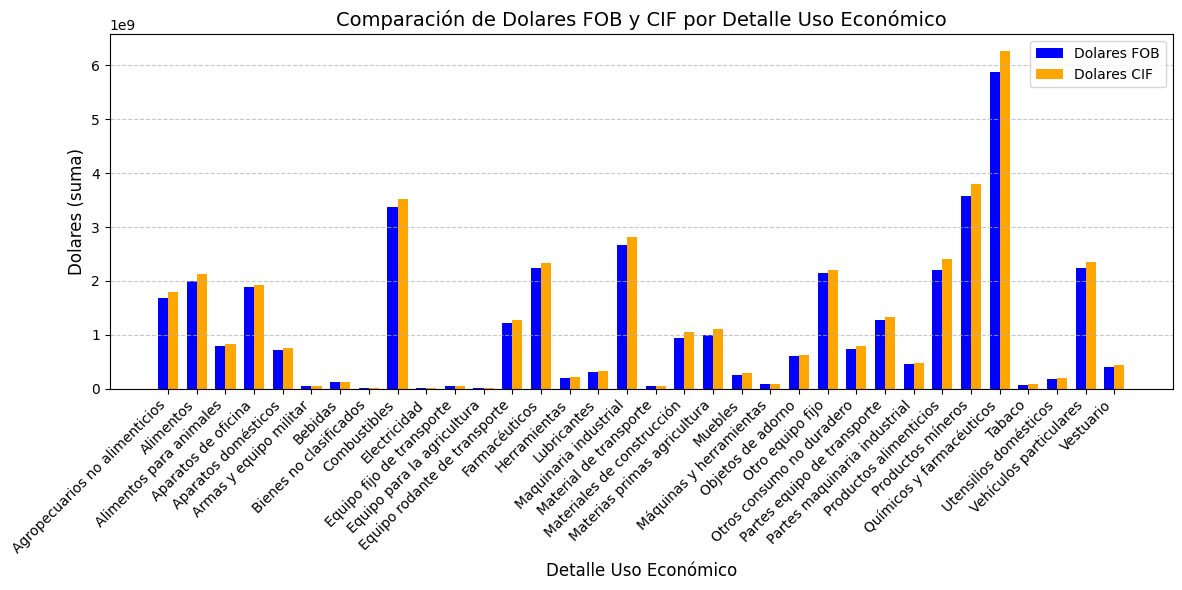

In [62]:
# Agrupar datos por 'Detalle Uso Económico' y calcular la suma de 'Dólares FOB' y 'Dólares CIF'
df_grouped = df_combined.groupby('Detalle uso economico')[['Dolares FOB', 'Dolares CIF']].sum()

# Configurar el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35  # Ancho de las barras
index = range(len(df_grouped))  # Posiciones de las categorías

# Crear las barras
ax.bar(index, df_grouped['Dolares FOB'], bar_width, label='Dolares FOB', color='blue')
ax.bar([i + bar_width for i in index], df_grouped['Dolares CIF'], bar_width, label='Dolares CIF', color='orange')

# Configurar etiquetas y título
ax.set_xlabel('Detalle Uso Económico', fontsize=12)
ax.set_ylabel('Dolares (suma)', fontsize=12)
ax.set_title('Comparación de Dolares FOB y CIF por Detalle Uso Económico', fontsize=14)
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(df_grouped.index, rotation=45, ha='right', fontsize=10)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


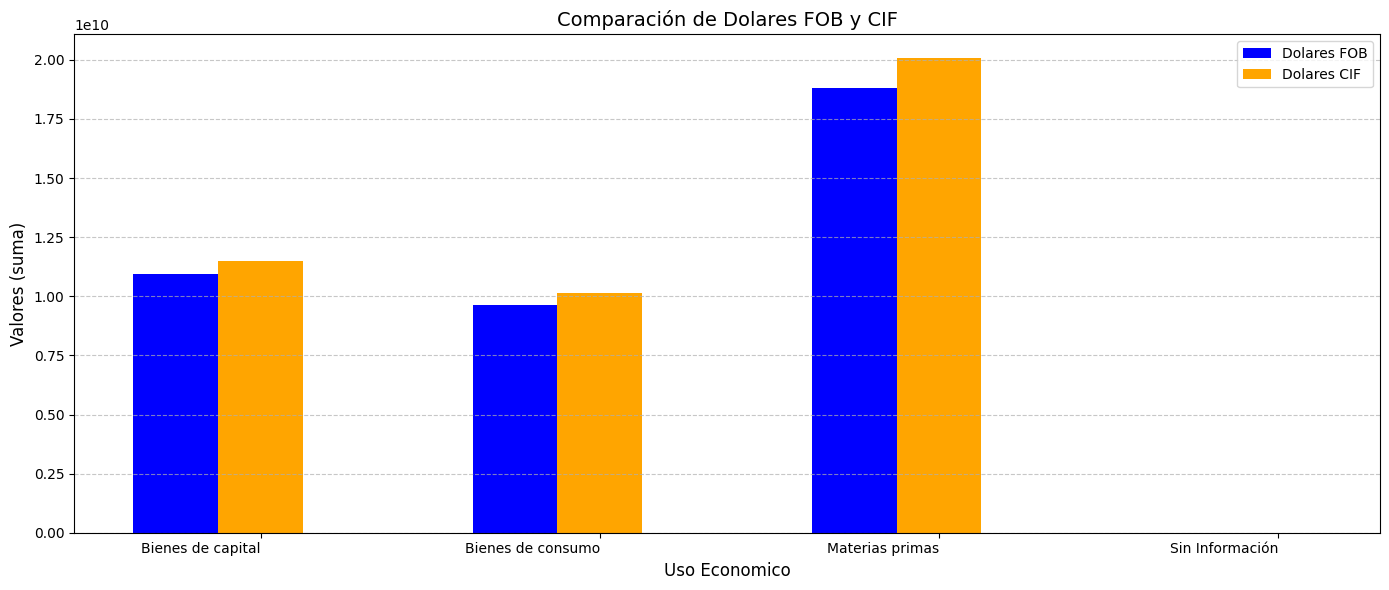

In [73]:
# Agrupar datos por 'Detalle Uso Económico' y calcular la suma de 'Dólares FOB', 'Dólares CIF', y 'Kilogramos netos'
df_grouped = df_combined.groupby('Uso economico')[['Dolares FOB', 'Dolares CIF']].sum()

# Configurar el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(14, 6))
bar_width = 0.25  # Ancho de las barras
index = np.arange(len(df_grouped))  # Posiciones de las categorías

# Crear las barras
ax.bar(index, df_grouped['Dolares FOB'], bar_width, label='Dolares FOB', color='blue')
ax.bar(index + bar_width, df_grouped['Dolares CIF'], bar_width, label='Dolares CIF', color='orange')

# Configurar etiquetas y título
ax.set_xlabel('Uso Economico', fontsize=12)
ax.set_ylabel('Valores (suma)', fontsize=12)
ax.set_title('Comparación de Dolares FOB y CIF', fontsize=14)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(df_grouped.index, rotation=360, ha='right', fontsize=10)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

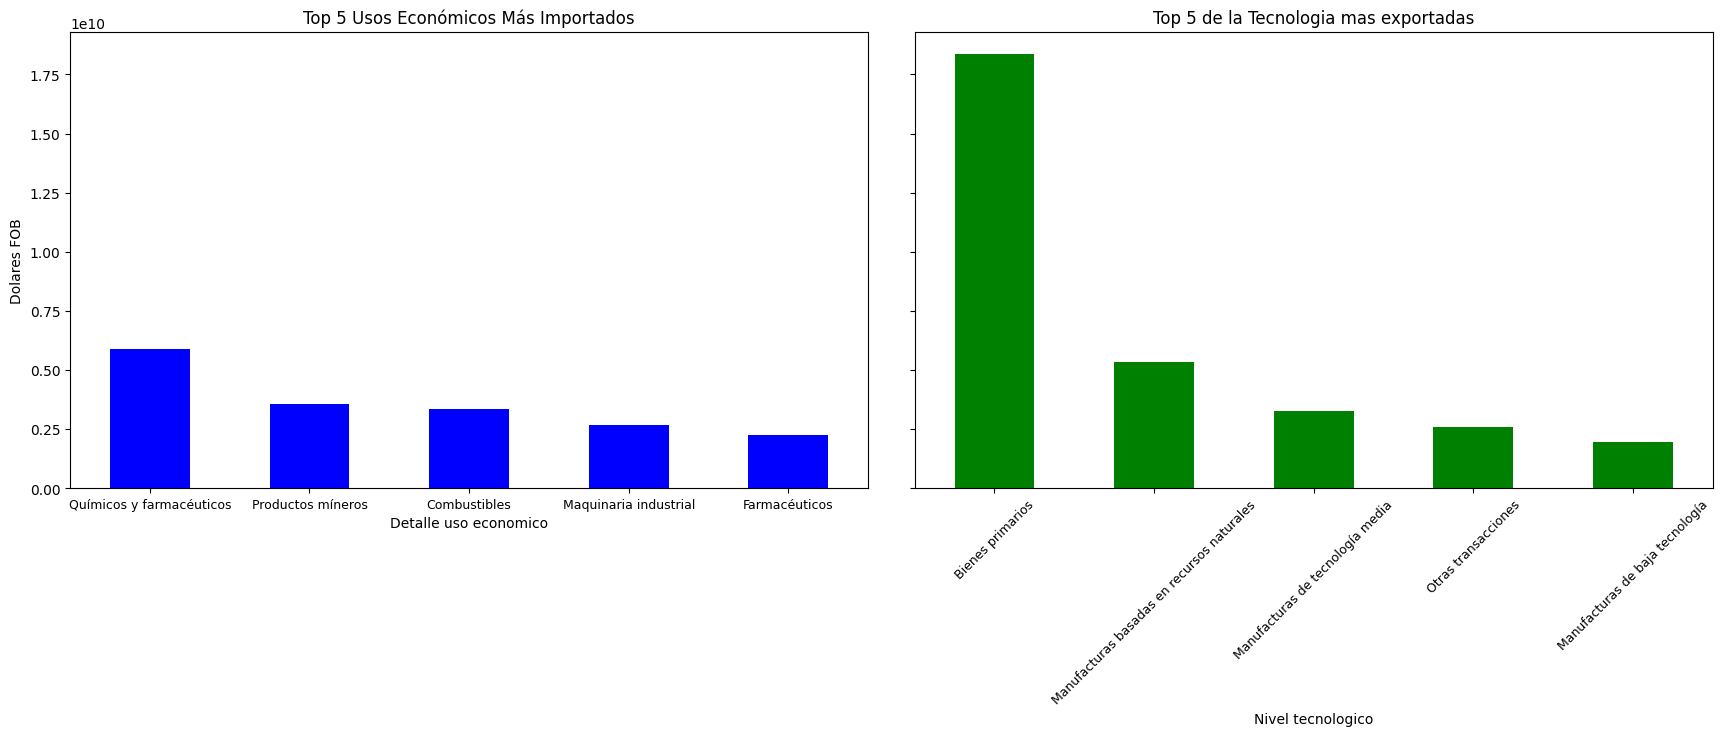

In [90]:
# Filtrar los datos para importaciones y exportaciones
importaciones = df_combined[df_combined['Type'] == 'Import']
exportaciones = df_combined[df_combined['Type'] == 'Export']

# Agrupar por 'Detalle Uso Económico' y sumar los valores FOB
importaciones_uso = importaciones.groupby('Detalle uso economico')['Dolares FOB'].sum().sort_values(ascending=False)
exportaciones_uso = exportaciones.groupby('Nivel tecnologico')['Dolares FOB'].sum().sort_values(ascending=False)

# Obtener el uso económico más importado y exportado
top_importaciones = importaciones_uso.head(5)  
top_exportaciones = exportaciones_uso.head(5)  

# Configurar el gráfico
fig, ax = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Gráfico de las importaciones
top_importaciones.plot(kind='bar', color='blue', ax=ax[0])
ax[0].set_title('Top 5 Usos Económicos Más Importados')
ax[0].set_xlabel('Detalle uso economico')
ax[0].set_ylabel('Dolares FOB')
ax[0].tick_params(axis='x', rotation=0,labelsize=9)
ax[0].set_xticklabels(ax[0].get_xticklabels(), ha='center')

# Gráfico de las exportaciones
top_exportaciones.plot(kind='bar', color='green', ax=ax[1])
ax[1].set_title('Top 5 de la Tecnologia mas exportadas')
ax[1].set_xlabel('Nivel tecnologico')
ax[1].tick_params(axis='x', rotation=45, labelsize=9)
ax[1].set_xticklabels(ax[1].get_xticklabels(), ha='center')

# Ajustar diseño y mostrar el gráfico
plt.tight_layout(pad=3)
plt.show()


In [41]:
# Crear una lista de nombres de meses
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Crear una nueva columna con los nombres de los meses
df_combined['Mes_nombre'] = df_combined['Mes'].apply(lambda x: meses[x - 1])

# Convertir la nueva columna en categórica y ordenada
df_combined['Mes_nombre'] = pd.Categorical(df_combined['Mes_nombre'], categories=meses, ordered=True)

# Verificar el resultado
print(df_combined[['Mes', 'Mes_nombre']].head(5))

   Mes Mes_nombre
0    1      Enero
1    1      Enero
2    1      Enero
3    1      Enero
4    1      Enero


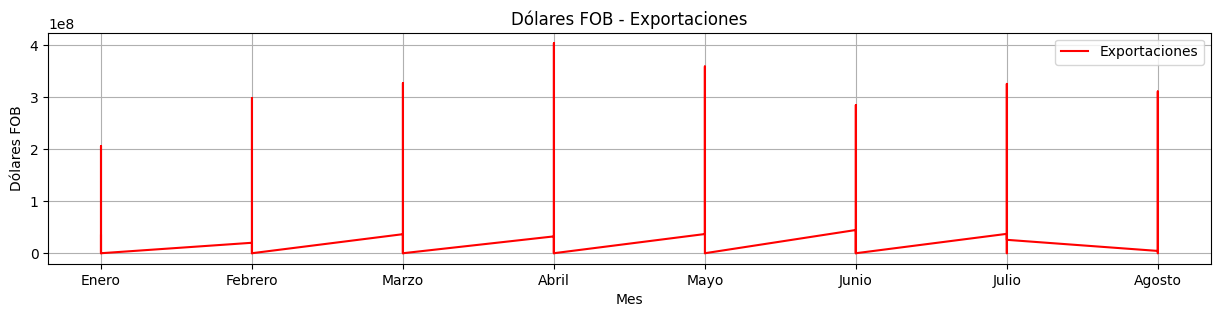

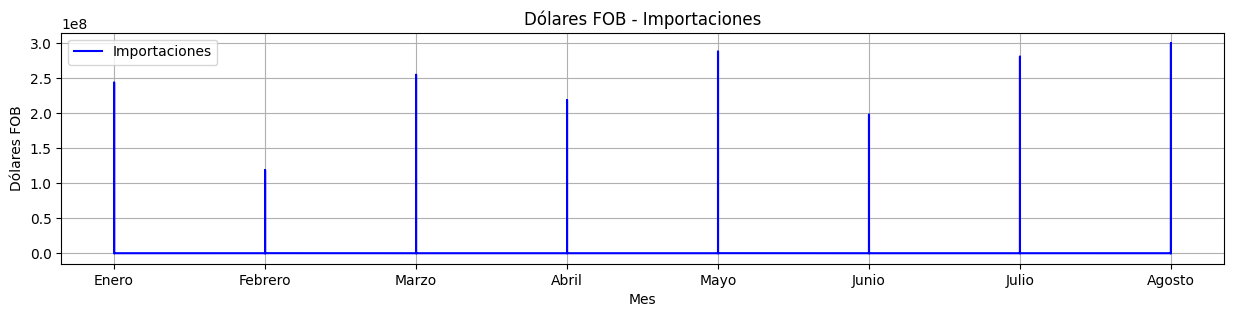

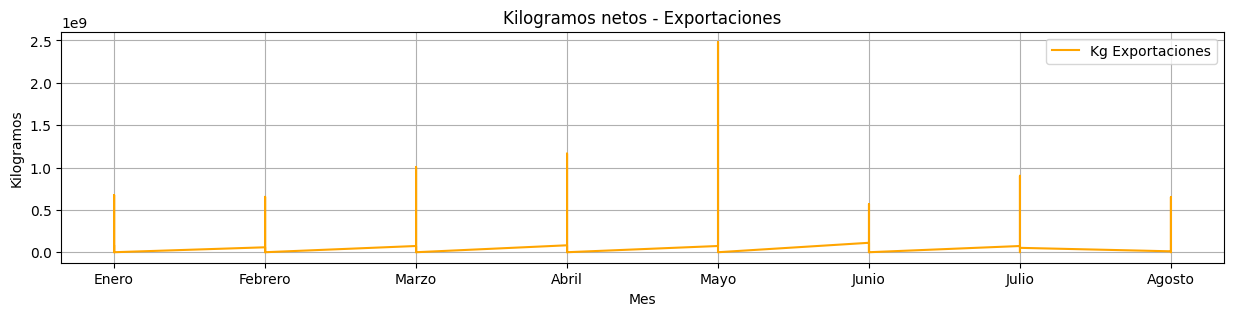

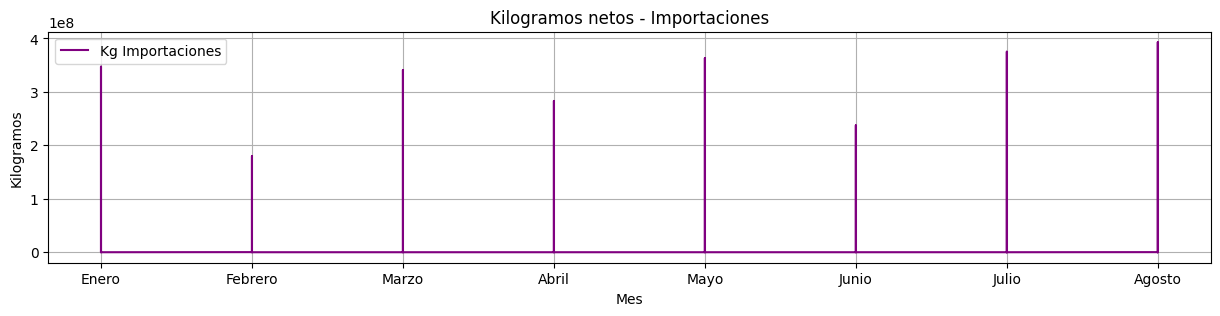

In [43]:
# Gráfico 1: Dólares FOB - Exportaciones
plt.figure(figsize=(15, 3))
export_data = df_combined[df_combined['Type'] == 'Export']
if not export_data.empty:
    plt.plot(export_data['Mes_nombre'], export_data['Dolares FOB'], color='r', label='Exportaciones')
    plt.title('Dólares FOB - Exportaciones')
    plt.xlabel('Mes')
    plt.ylabel('Dólares FOB')
    plt.legend()
    plt.grid()
    plt.show()

# Gráfico 2: Dólares FOB - Importaciones
plt.figure(figsize=(15, 3))
import_data = df_combined[df_combined['Type'] == 'Import']
if not import_data.empty:
    plt.plot(import_data['Mes_nombre'], import_data['Dolares FOB'], color='b', label='Importaciones')
    plt.title('Dólares FOB - Importaciones')
    plt.xlabel('Mes')
    plt.ylabel('Dólares FOB')
    plt.legend()
    plt.grid()
    plt.show()

# Gráfico 3: Kilogramos netos - Exportaciones
plt.figure(figsize=(15, 3))
if not export_data.empty:
    plt.plot(export_data['Mes_nombre'], export_data['Kilogramos netos'], color='orange', label='Kg Exportaciones')
    plt.title('Kilogramos netos - Exportaciones')
    plt.xlabel('Mes')
    plt.ylabel('Kilogramos')
    plt.legend()
    plt.grid()
    plt.show()

# Gráfico 4: Kilogramos netos - Importaciones
plt.figure(figsize=(15, 3))
if not import_data.empty:
    plt.plot(import_data['Mes_nombre'], import_data['Kilogramos netos'], color='purple', label='Kg Importaciones')
    plt.title('Kilogramos netos - Importaciones')
    plt.xlabel('Mes')
    plt.ylabel('Kilogramos')
    plt.legend()
    plt.grid()
    plt.show()



Conclusiones _ Grafico de Dispersión
Mayor concentración en la región baja: La mayoría de las transacciones tienen valores FOB y pesos moderados, lo cual podría ser típico para productos o bienes de bajo costo unitario.

Atípicos o extremos:Las transacciones que caen fuera de las desviaciones estándar podrían ser productos de alto valor (como maquinaria, tecnología) o de alto volumen (como materias primas o productos agrícolas).

Correlación positiva: La relación observada entre FOB y kilogramos sugiere que en general, a mayor peso de los productos, mayor es el valor FOB, lo que es esperable en transacciones comerciales.

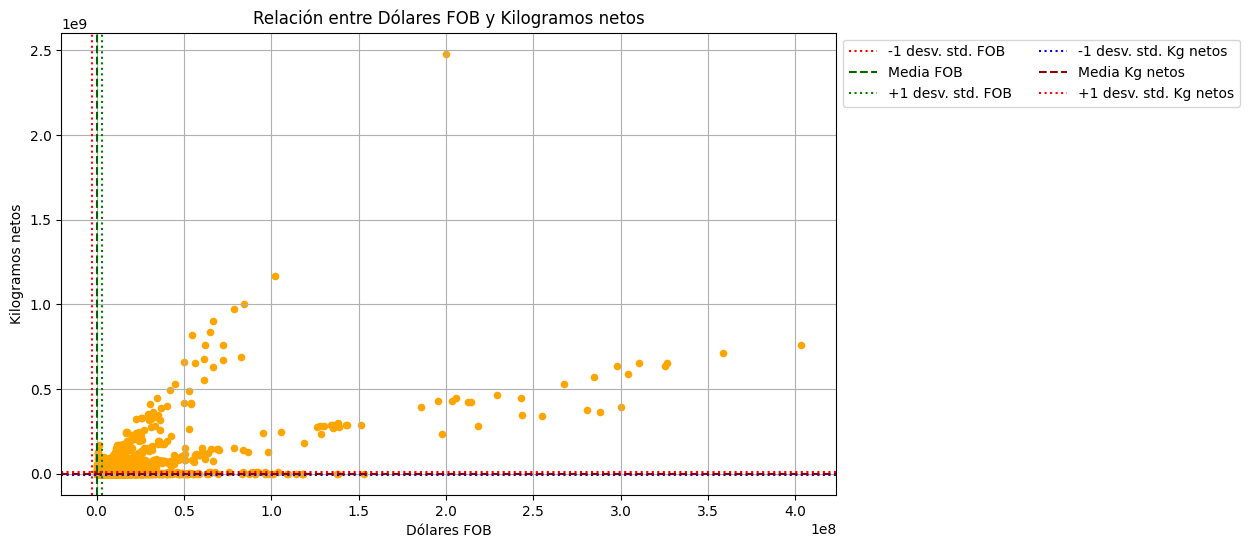

In [46]:
# Definir las variables de análisis
x = df_combined['Dolares FOB']
y = df_combined['Kilogramos netos']

# Crear un gráfico de dispersión
fig = df_combined.plot(kind="scatter", x='Dolares FOB', y='Kilogramos netos', c='orange', figsize=(10, 6))

# Agregar líneas de desviación estándar y medias para Dólares FOB
plt.axvline(np.mean(x) - np.std(x), c='r', linestyle=':', label='-1 desv. std. FOB')
plt.axvline(np.mean(x), c='darkgreen', linestyle='--', label='Media FOB')
plt.axvline(np.mean(x) + np.std(x), c='g', linestyle=':', label='+1 desv. std. FOB')

# Agregar líneas de desviación estándar y medias para Kilogramos netos
plt.axhline(np.mean(y) - np.std(y), c='b', linestyle=':', label='-1 desv. std. Kg netos')
plt.axhline(np.mean(y), c='darkred', linestyle='--', label='Media Kg netos')
plt.axhline(np.mean(y) + np.std(y), c='r', linestyle=':', label='+1 desv. std. Kg netos')

# Configurar leyenda y mostrar el gráfico
plt.legend(loc='best', bbox_to_anchor=(1, 1), ncol=2)
plt.title('Relación entre Dólares FOB y Kilogramos netos')
plt.xlabel('Dólares FOB')
plt.ylabel('Kilogramos netos')
plt.grid()
plt.show()


Mapa de Calor

Relaciones fuertes que destacan:
Los valores FOB (Dólares FOB) y CIF (Dólares CIF) están estrechamente relacionados, lo que es consistente con su naturaleza económica.
Existe una correlación notable entre el peso de las exportaciones/importaciones (Kilogramos netos) y sus valores económicos (Dólares FOB).

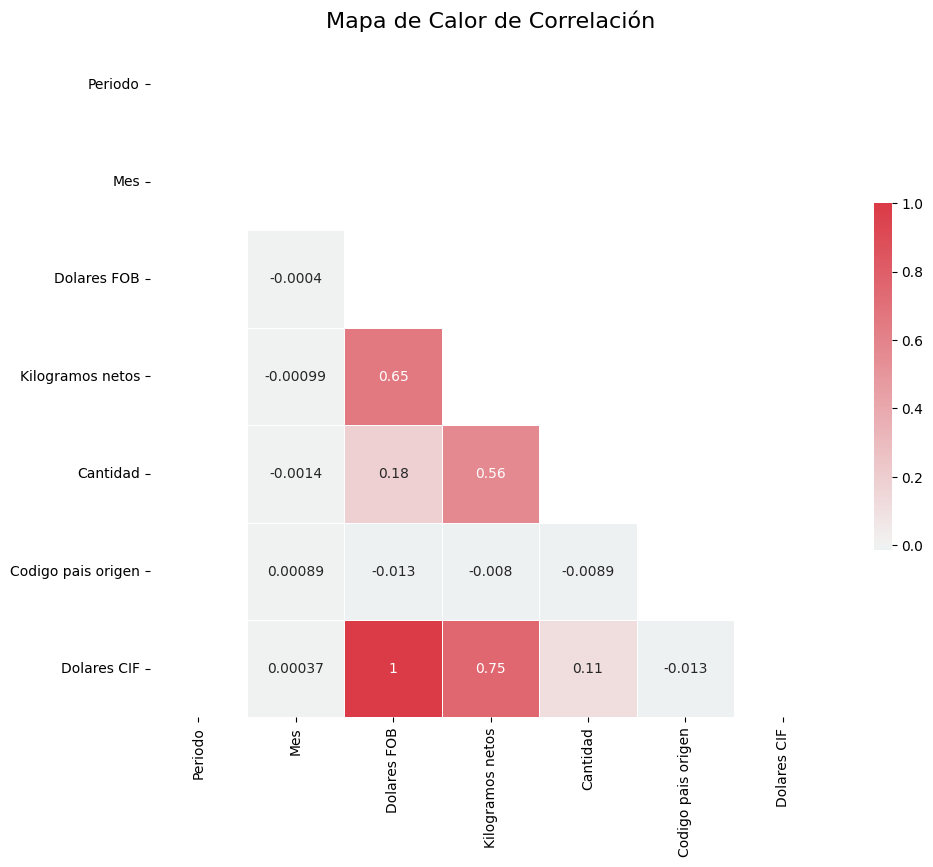

In [ ]:
df_numeric = df_combined.select_dtypes(include=[np.number])
corr = df_numeric.corr()

# Generar una máscara para ocultar el triángulo superior
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Configurar el tamaño de la figura
f, ax = plt.subplots(figsize=(11, 9))

# mapa de colores personalizado
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#  mapa de calor
sns.heatmap(
    corr, 
    mask=mask, 
    cmap=cmap, 
    vmax=1, 
    center=0,
    annot=True,  
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .5}
)

# Título del gráfico
plt.title("Mapa de Calor de Correlación", fontsize=16)
plt.show()



In [28]:
# Promedio de valor FOB para cada tipo
print(df_combined.groupby('Type')['Dolares FOB'].mean())

# Suma total por tipo
print(df_combined.groupby('Type')['Dolares FOB'].sum())


Type
Export    301122.848704
Import    143969.114267
Name: Dolares FOB, dtype: float64
Type
Export    3.248303e+10
Import    3.937123e+10
Name: Dolares FOB, dtype: float64


In [30]:
# Suma de exportaciones e importaciones por país
print(df_combined.groupby(['Type', 'Pais destino'])['Dolares FOB'].sum())


Type    Pais destino                                                           
Export  Albania                                                                    6.394438e+06
        Alemania                                                                   3.964965e+08
        Andorra                                                                    4.440000e+03
        Angola                                                                     1.057898e+06
        Antigua Y Barbuda                                                          1.102657e+06
                                                                                       ...     
        Zona Franca Permanente la Cayena                                           1.030421e+06
        Zona Franca de Bogotá S.A.                                                 6.348922e+06
        Zona Franca de Occidente (Mosquera)                                        3.603880e+05
        Zona Franca de la Candelaria. Centro Internacion

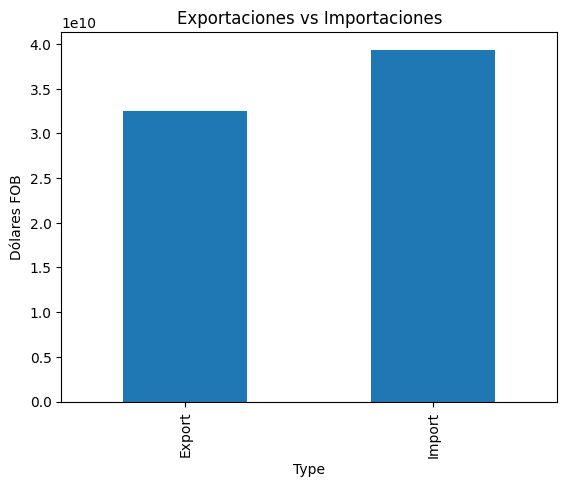

In [31]:
# Datos agrupados por tipo
grouped = df_combined.groupby('Type')['Dolares FOB'].sum()

# Crear gráfico de barras
grouped.plot(kind='bar', title='Exportaciones vs Importaciones', ylabel='Dólares FOB')
plt.show()

El valor total de las importaciones es mayor que el de las exportaciones:
Conclusión: Hay un déficit comercial (el país importa más de lo que exporta).

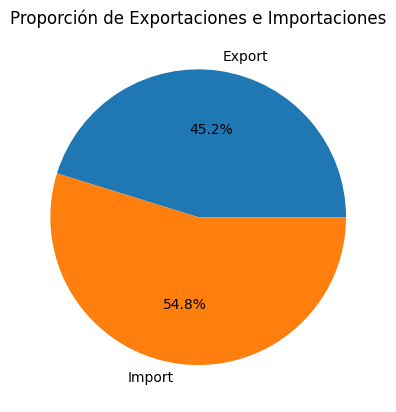

In [32]:
# Proporción de exportaciones e importaciones
grouped.plot(kind='pie', autopct='%1.1f%%', title='Proporción de Exportaciones e Importaciones')
plt.ylabel('')  # Eliminar etiqueta innecesaria
plt.show()